# <p style="background-color:#8A784E;font-family:newtimeroman;color:#FFF9ED;font-size:90%;text-align:center;border-radius:10px; border: 2px solidrgb(98, 0, 255); padding: 10px;"> Heart Disease Prediction</p>


## Introduction

Heart disease is one of the leading causes of death worldwide, making early detection and risk assessment essential for improving patient outcomes. With the increasing availability of healthcare data, machine learning techniques can be used to analyze clinical features and identify patterns associated with heart disease.

In this project, we develop a machine learning model to predict the presence of heart disease using patient clinical data. The workflow includes data preprocessing, exploratory data analysis, feature engineering, and training multiple classification models. The performance of these models is evaluated using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC to determine the most effective approach.

This project demonstrates how machine learning and data science techniques can support healthcare decision-making by providing reliable and interpretable predictions.


## Dataset Column Description

| Column Name | Description (Simple Explanation) |
|------------|----------------------------------|
| Age | The age of the person in years. The risk of heart disease generally increases with age. |
| Gender | The biological gender of the person (e.g., Male or Female). Gender can influence heart disease risk. |
| Blood Pressure | The force of blood pushing against artery walls. High blood pressure makes the heart work harder. |
| Cholesterol Level | The total amount of cholesterol in the blood. High levels can block blood vessels. |
| Exercise Habits | Describes how often the person exercises (e.g., low, moderate, high). Regular exercise reduces heart disease risk. |
| Smoking | Indicates whether the person smokes. Smoking damages blood vessels and increases heart disease risk. |
| Family Heart Disease | Shows if close family members have heart disease. Genetics can increase risk. |
| Diabetes | Indicates whether the person has diabetes. Diabetes can damage blood vessels and the heart. |
| BMI | Body Mass Index, a measure of body fat based on height and weight. High BMI is linked to heart problems. |
| High Blood Pressure | Indicates whether the person has a history of high blood pressure. |
| Low HDL Cholesterol | Shows whether the “good” cholesterol level is low. Low HDL increases heart disease risk. |
| High LDL Cholesterol | Indicates whether the “bad” cholesterol level is high, which can clog arteries. |
| Alcohol Consumption | How often or how much alcohol the person consumes. Excessive alcohol increases heart disease risk. |
| Stress Level | Represents how stressed the person is in daily life. Chronic stress can harm heart health. |
| Sleep Hours | Average number of hours the person sleeps per day. Poor sleep increases heart disease risk. |
| Sugar Consumption | Amount of sugar consumed regularly. High sugar intake increases obesity and diabetes risk. |
| Triglyceride Level | A type of fat found in the blood. High levels increase the risk of heart disease. |
| Fasting Blood Sugar | Blood sugar level measured after fasting. High values may indicate diabetes or pre-diabetes. |
| CRP Level | C-reactive protein level, which indicates inflammation in the body. Higher levels are linked to heart disease risk. |
| Homocysteine Level | An amino acid in the blood. High levels can damage blood vessels and increase heart disease risk. |
| Heart Disease Status | Target variable indicating whether the person has heart disease (1 = Yes, 0 = No). |


#
<a id='1'></a>

<p style="
    background: linear-gradient(to right, #5C4033, #8B5A2B); 
    font-family: 'Times New Roman', serif; 
    color: #F5DEB3; 
    font-size: 30px; 
    text-align: center; 
    border-radius: 12px; 
    padding: 12px; 
    border: 3px solid #D2B48C;
    box-shadow: 2px 2px 10px rgba(210, 180, 140, 0.5);
    font-weight: bold;
    letter-spacing: 1px;
">
    IMPORTING LIBRARIES
</p>


In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from imblearn.over_sampling import SMOTE
import math
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay,roc_auc_score, roc_curve,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from xgboost import XGBClassifier
from sklearn.feature_selection import chi2, mutual_info_classif, f_classif
from scipy.stats import pointbiserialr, chi2_contingency, spearmanr
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler,RobustScaler
from category_encoders import OneHotEncoder,BinaryEncoder, OrdinalEncoder
from lightgbm import LGBMClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Recall, Precision, AUC
import joblib
import warnings
warnings.filterwarnings('ignore')


#
<a id='1'></a>

<p style="
    background: linear-gradient(to right, #5C4033, #8B5A2B); 
    font-family: 'Times New Roman', serif; 
    color: #F5DEB3; 
    font-size: 30px; 
    text-align: center; 
    border-radius: 12px; 
    padding: 12px; 
    border: 3px solid #D2B48C;
    box-shadow: 2px 2px 10px rgba(210, 180, 140, 0.5);
    font-weight: bold;
    letter-spacing: 1px;
">
    LOADING DATASET
</p>


In [165]:
df=pd.read_csv(r"C:\Users\moham\Downloads\Amit_Course\Graduation_Project\Heart_Disease_Prediction\Data\heart_disease.csv")
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [166]:
df.shape

(10000, 21)

#
<a id='1'></a>

<p style="
    background: linear-gradient(to right, #5C4033, #8B5A2B); 
    font-family: 'Times New Roman', serif; 
    color: #F5DEB3; 
    font-size: 30px; 
    text-align: center; 
    border-radius: 12px; 
    padding: 12px; 
    border: 3px solid #D2B48C;
    box-shadow: 2px 2px 10px rgba(210, 180, 140, 0.5);
    font-weight: bold;
    letter-spacing: 1px;
">
    DATA OVERVIEW
</p>


In [167]:
def data_info(data):

    """
    This function returns a DataFrame containing the summary information for each column 
    """

    Names=[col for col in data]
    data_types=[data[col].dtype for col in data.columns]
    top_10_unique_values=[data[col].value_counts().head(10).index.to_list() for col in data.columns]
    nunique_values=[data[col].nunique() for col in data.columns]
    nulls=[data[col].isnull().sum() for col in data.columns]
    percent_of_Nulls= [data[col].isnull().sum()/len(data)*100 for col in data.columns]
    duplicates=data.duplicated().sum()


    info_df=pd.DataFrame({'Name':Names,
                          'Data_Type':data_types,
                          'Top_10_Unique_Values':top_10_unique_values,
                          'Nunique_Values':nunique_values,
                          'Nulls':nulls,
                          'Percent_of_Nulls':percent_of_Nulls,
                          'Duplicates':duplicates})
    return info_df

In [168]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,Age,float64,"[71.0, 64.0, 43.0, 34.0, 62.0, 72.0, 66.0, 76....",63,29,0.29,0
1,Gender,object,"[Male, Female]",2,19,0.19,0
2,Blood Pressure,float64,"[134.0, 167.0, 171.0, 140.0, 142.0, 170.0, 133...",61,19,0.19,0
3,Cholesterol Level,float64,"[292.0, 186.0, 288.0, 185.0, 193.0, 255.0, 162...",151,30,0.30,0
4,Exercise Habits,object,"[High, Medium, Low]",3,25,0.25,0
5,Smoking,object,"[Yes, No]",2,25,0.25,0
6,Family Heart Disease,object,"[No, Yes]",2,21,0.21,0
7,Diabetes,object,"[No, Yes]",2,30,0.30,0
8,BMI,float64,"[24.991591091690363, 37.9932729831996, 22.6497...",9978,22,0.22,0
9,High Blood Pressure,object,"[Yes, No]",2,26,0.26,0


In [169]:
df.describe().T.style.bar(subset=['mean'], color='#FFA07A').background_gradient(
    subset=['std', '50%', 'max'], cmap='Blues').set_properties(
        **{'font-size': '12pt', 'border': '1.5px solid black'}).set_caption("🔍 Summary Statistics of the Dataset")

,count,mean,std,min,25%,50%,75%,max
Age,9971.000000,49.296259,18.193970,18.000000,34.000000,49.000000,65.000000,80.000000
Blood Pressure,9981.000000,149.757740,17.572969,120.000000,134.000000,150.000000,165.000000,180.000000
Cholesterol Level,9970.000000,225.425577,43.575809,150.000000,187.000000,226.000000,263.000000,300.000000
BMI,9978.000000,29.077269,6.307098,18.002837,23.658075,29.079492,34.520015,39.996954
Sleep Hours,9975.000000,6.991329,1.753195,4.000605,5.449866,7.003252,8.531577,9.999952
Triglyceride Level,9974.000000,250.734409,87.067226,100.000000,176.000000,250.000000,326.000000,400.000000
Fasting Blood Sugar,9978.000000,120.142213,23.584011,80.000000,99.000000,120.000000,141.000000,160.000000
CRP Level,9974.000000,7.472201,4.340248,0.003647,3.674126,7.472164,11.255592,14.997087
Homocysteine Level,9980.000000,12.456271,4.323426,5.000236,8.723334,12.409395,16.140564,19.999037


## Initial Data Insights

Before performing detailed analysis and model training, an initial exploration of the dataset reveals several important observations regarding data quality, feature diversity, and potential challenges.

### 1. Dataset Size and Feature Variety
The dataset contains a large number of records (approximately 10,000 samples) and a diverse set of features, including demographic information, lifestyle factors, clinical measurements, and biochemical markers. This diversity allows the model to learn complex relationships between lifestyle habits, medical conditions, and heart disease risk.

### 2. Data Types and Feature Composition
The dataset includes a mix of numerical features (e.g., Age, Blood Pressure, BMI, Cholesterol Level, Triglyceride Level) and categorical features (e.g., Gender, Exercise Habits, Smoking, Diabetes). This indicates that appropriate preprocessing steps such as encoding categorical variables and scaling numerical features will be required before model training.

### 3. Missing Values Distribution
Several columns contain missing values, though most features have a relatively low percentage of null values (below 1%). However, the Alcohol Consumption feature stands out with a significantly higher missing rate (approximately 25%), which may impact model performance if not handled carefully. This suggests the need for thoughtful imputation strategies or feature-specific preprocessing decisions.

### 4. Categorical Feature Balance
Many categorical variables have a limited number of unique values, such as Gender (Male/Female), Smoking (Yes/No), and Diabetes (Yes/No). This structure simplifies encoding but also highlights the importance of checking class balance within these features to avoid biased learning.

### 5. Numerical Feature Variability
Numerical features such as Cholesterol Level, Triglyceride Level, CRP Level, and Homocysteine Level exhibit a wide range of values. This variability suggests the presence of outliers and differing scales, making feature scaling and outlier analysis essential steps in the preprocessing phase.

### 6. Target Variable Quality
The target variable, Heart Disease Status, contains no missing values, which is ideal for supervised learning. However, its class distribution should be examined to determine whether the dataset is balanced or requires imbalance handling techniques such as class weighting or resampling.

### 7. Duplicate Records
No duplicate rows were detected in the dataset, indicating good data integrity and reducing the need for duplicate handling during preprocessing.

### Summary
Overall, the dataset is well-structured and suitable for a large-scale machine learning project. The presence of both lifestyle and medical features, combined with a large sample size, provides a strong foundation for building robust predictive models. Addressing missing values, scaling numerical features, encoding categorical variables, and managing potential class imbalance will be critical steps in the next stages of the project.


#
<a id='1'></a>

<p style="
    background: linear-gradient(to right, #5C4033, #8B5A2B); 
    font-family: 'Times New Roman', serif; 
    color: #F5DEB3; 
    font-size: 30px; 
    text-align: center; 
    border-radius: 12px; 
    padding: 12px; 
    border: 3px solid #D2B48C;
    box-shadow: 2px 2px 10px rgba(210, 180, 140, 0.5);
    font-weight: bold;
    letter-spacing: 1px;
">
    EDA (Exploratory Data Analysis)
</p>


## Numerical Columns

In [170]:
def Plot_Numerical_features(data):
    num_cols=data.select_dtypes(include=["number"]).columns
    total_cols=3
    total_rows=math.ceil(len(num_cols)/total_cols)
    plt.figure(figsize=(20, 5*total_rows))

    idx=1

    for col in num_cols:
        plt.subplot(total_rows,total_cols,idx)
        sns.histplot(data[col], kde=True, color="navy", edgecolor="black")
        plt.title(f"{col} distribution and skewness= {data[col].skew()}")
        idx+=1
    plt.tight_layout()
    plt.show()

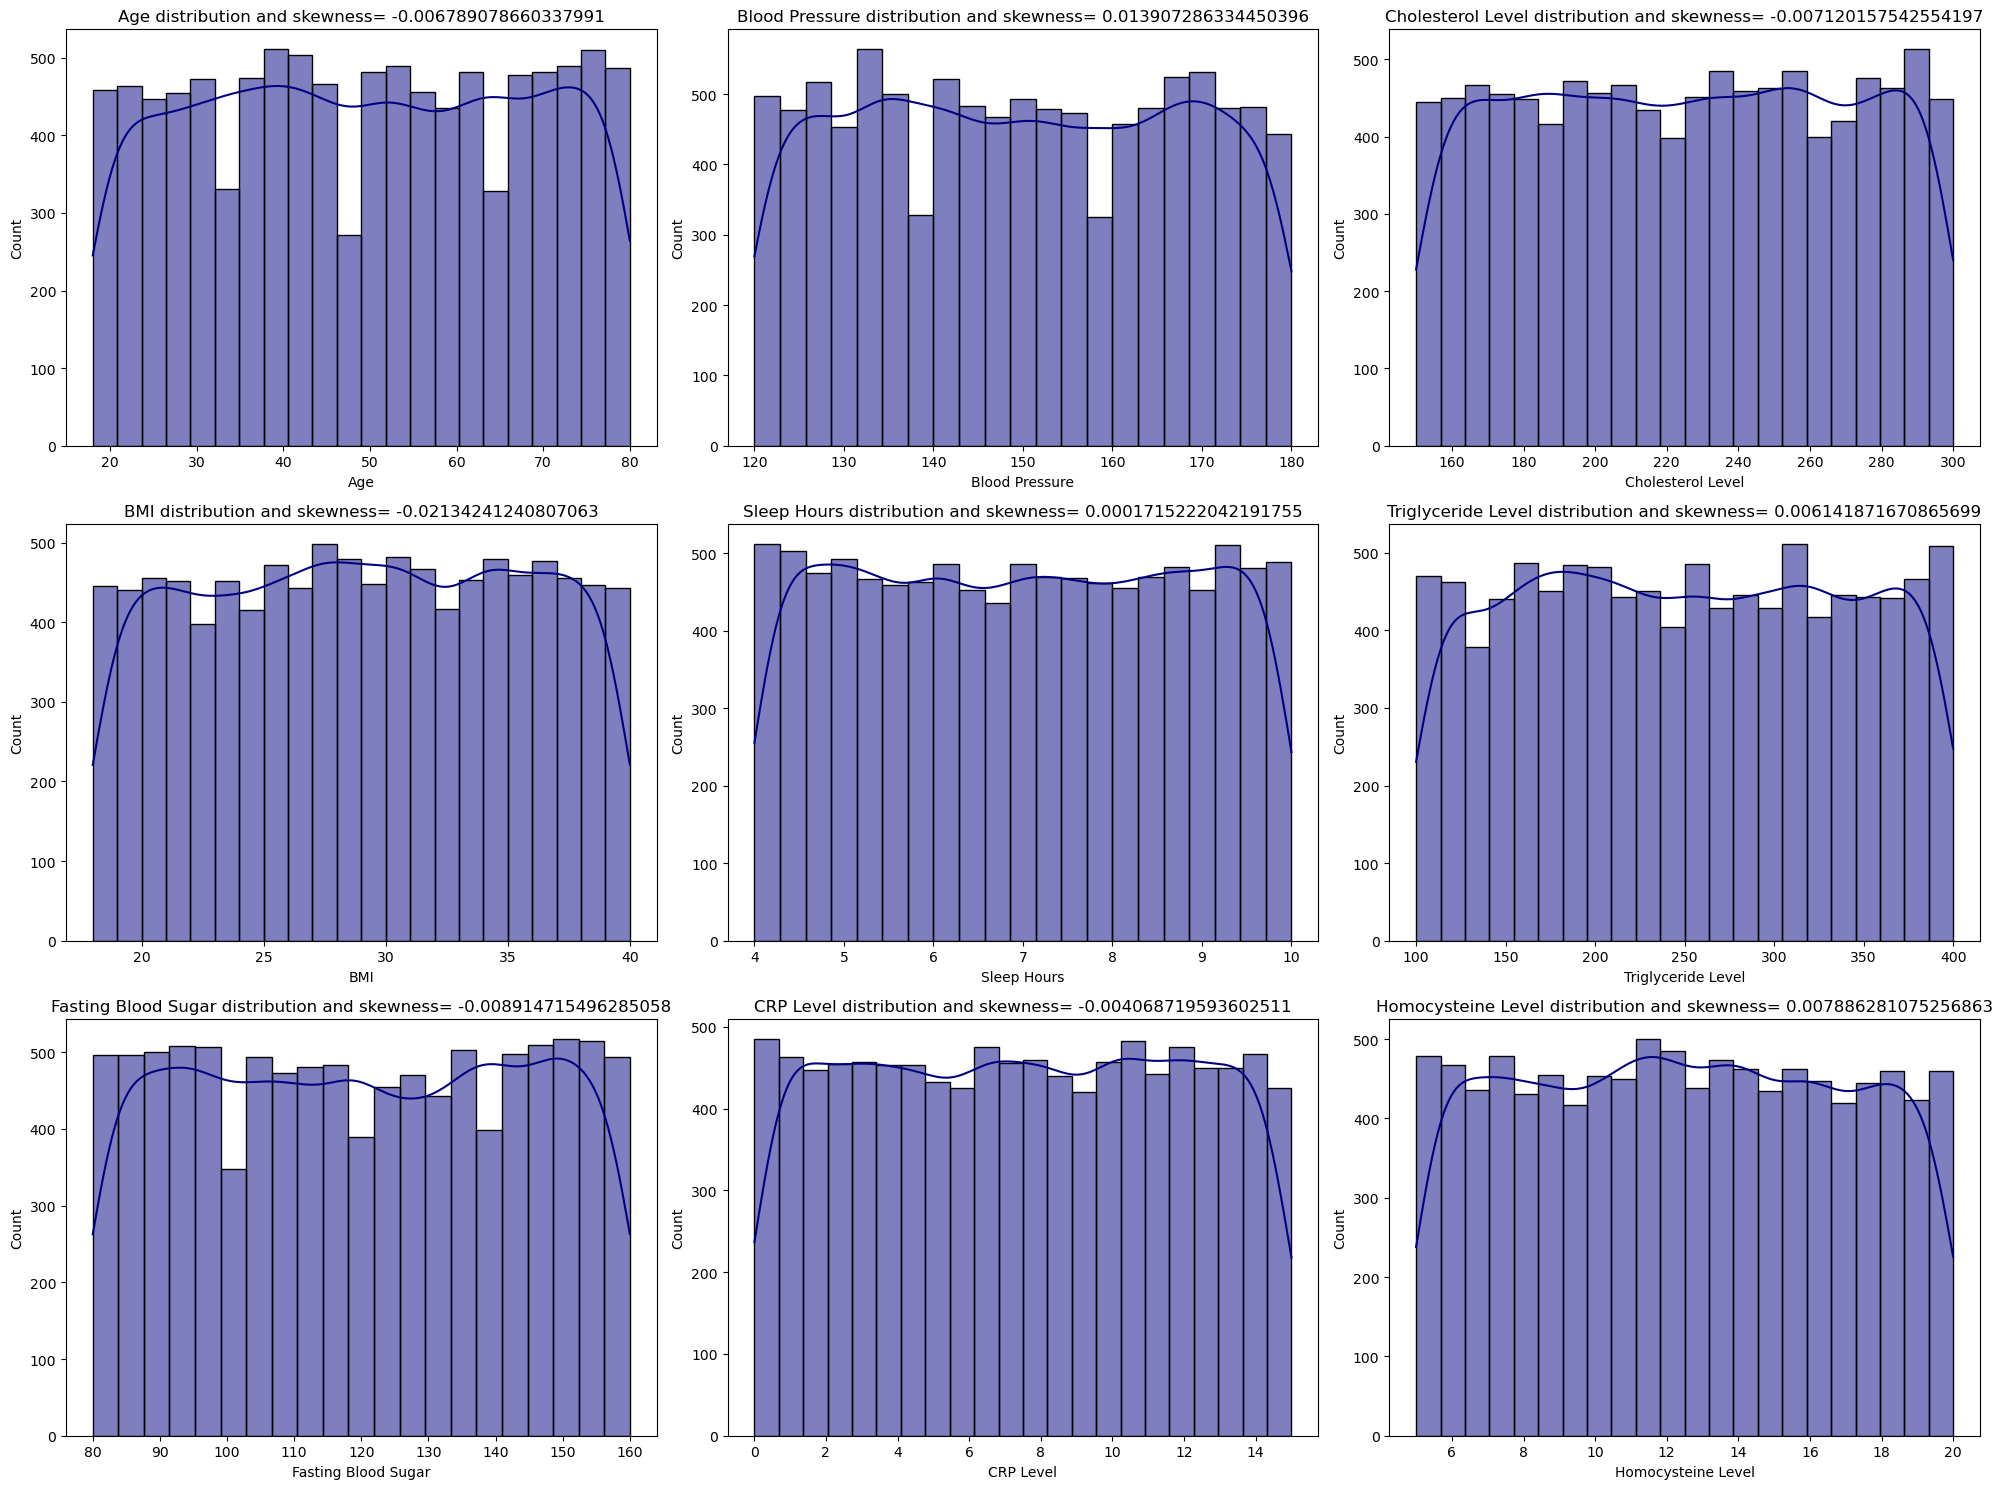

In [171]:
Plot_Numerical_features(df)

### Numerical Features Distribution Insights

An analysis of the numerical features provides valuable insights into the structure, variability, and statistical properties of the dataset.

### 1. Age
The age distribution appears approximately symmetric with very low skewness, indicating a well-balanced representation of different age groups. This suggests that the dataset captures both younger and older individuals fairly evenly, which is beneficial for building a generalizable model.

### 2. Blood Pressure
Blood pressure values show a nearly normal distribution with minimal skewness. This indicates stable measurement patterns and reduces the likelihood of strong outliers influencing the model. Blood pressure can therefore be used directly after scaling.

### 3. Cholesterol Level
Cholesterol levels are evenly distributed across a wide range with near-zero skewness. This suggests diverse cholesterol profiles within the population and highlights its importance as a strong predictive feature for heart disease risk.

### 4. Body Mass Index (BMI)
BMI values are well-distributed with slight negative skewness, indicating a marginally higher concentration of individuals with moderate to higher BMI values. This reflects realistic population trends and reinforces BMI as a meaningful health indicator.

### 5. Sleep Hours
Sleep hours show a balanced distribution centered around typical sleep durations. The near-zero skewness indicates consistent sleep patterns across individuals, making this feature reliable for modeling lifestyle-related risk factors.

### 6. Triglyceride Level
Triglyceride levels exhibit a broad spread with minimal skewness, suggesting variability across individuals without extreme bias. This variability is useful for identifying metabolic risk patterns related to heart disease.

### 7. Fasting Blood Sugar
Fasting blood sugar values are evenly distributed with low skewness, indicating that both normal and elevated blood sugar levels are well represented. This makes the feature valuable for detecting diabetes-related cardiovascular risk.

### 8. CRP Level
CRP (C-reactive protein) levels show a stable distribution with minimal skewness, suggesting consistent inflammation markers across the dataset. This supports its use as an indicator of systemic inflammation linked to heart disease.

### 9. Homocysteine Level
Homocysteine levels demonstrate a fairly uniform distribution with slight negative skewness. Since elevated homocysteine is associated with vascular damage, this feature may play an important role in risk prediction.

### Summary
Overall, the numerical features exhibit near-normal distributions with very low skewness values. This indicates good data quality, minimal transformation requirements, and suitability for machine learning models. Standard scaling techniques should be sufficient, and no aggressive normalization or logarithmic transformations appear necessary at this stage.


## Categorical Columns

In [172]:
def Plot_Categorical_features(data,):
    cat_cols=data.select_dtypes(include=["object","category","bool"]).columns
    total_cols=3
    total_rows=math.ceil(len(cat_cols)/total_cols)
    plt.figure(figsize=(20, 5*total_rows))

    idx=1

    for col in cat_cols:
        plt.subplot(total_rows,total_cols,idx)
        sns.countplot(x =data[col], palette="rocket", edgecolor="black")
        plt.title(f"{col} countplot")
        idx+=1
    plt.tight_layout()
    plt.show()

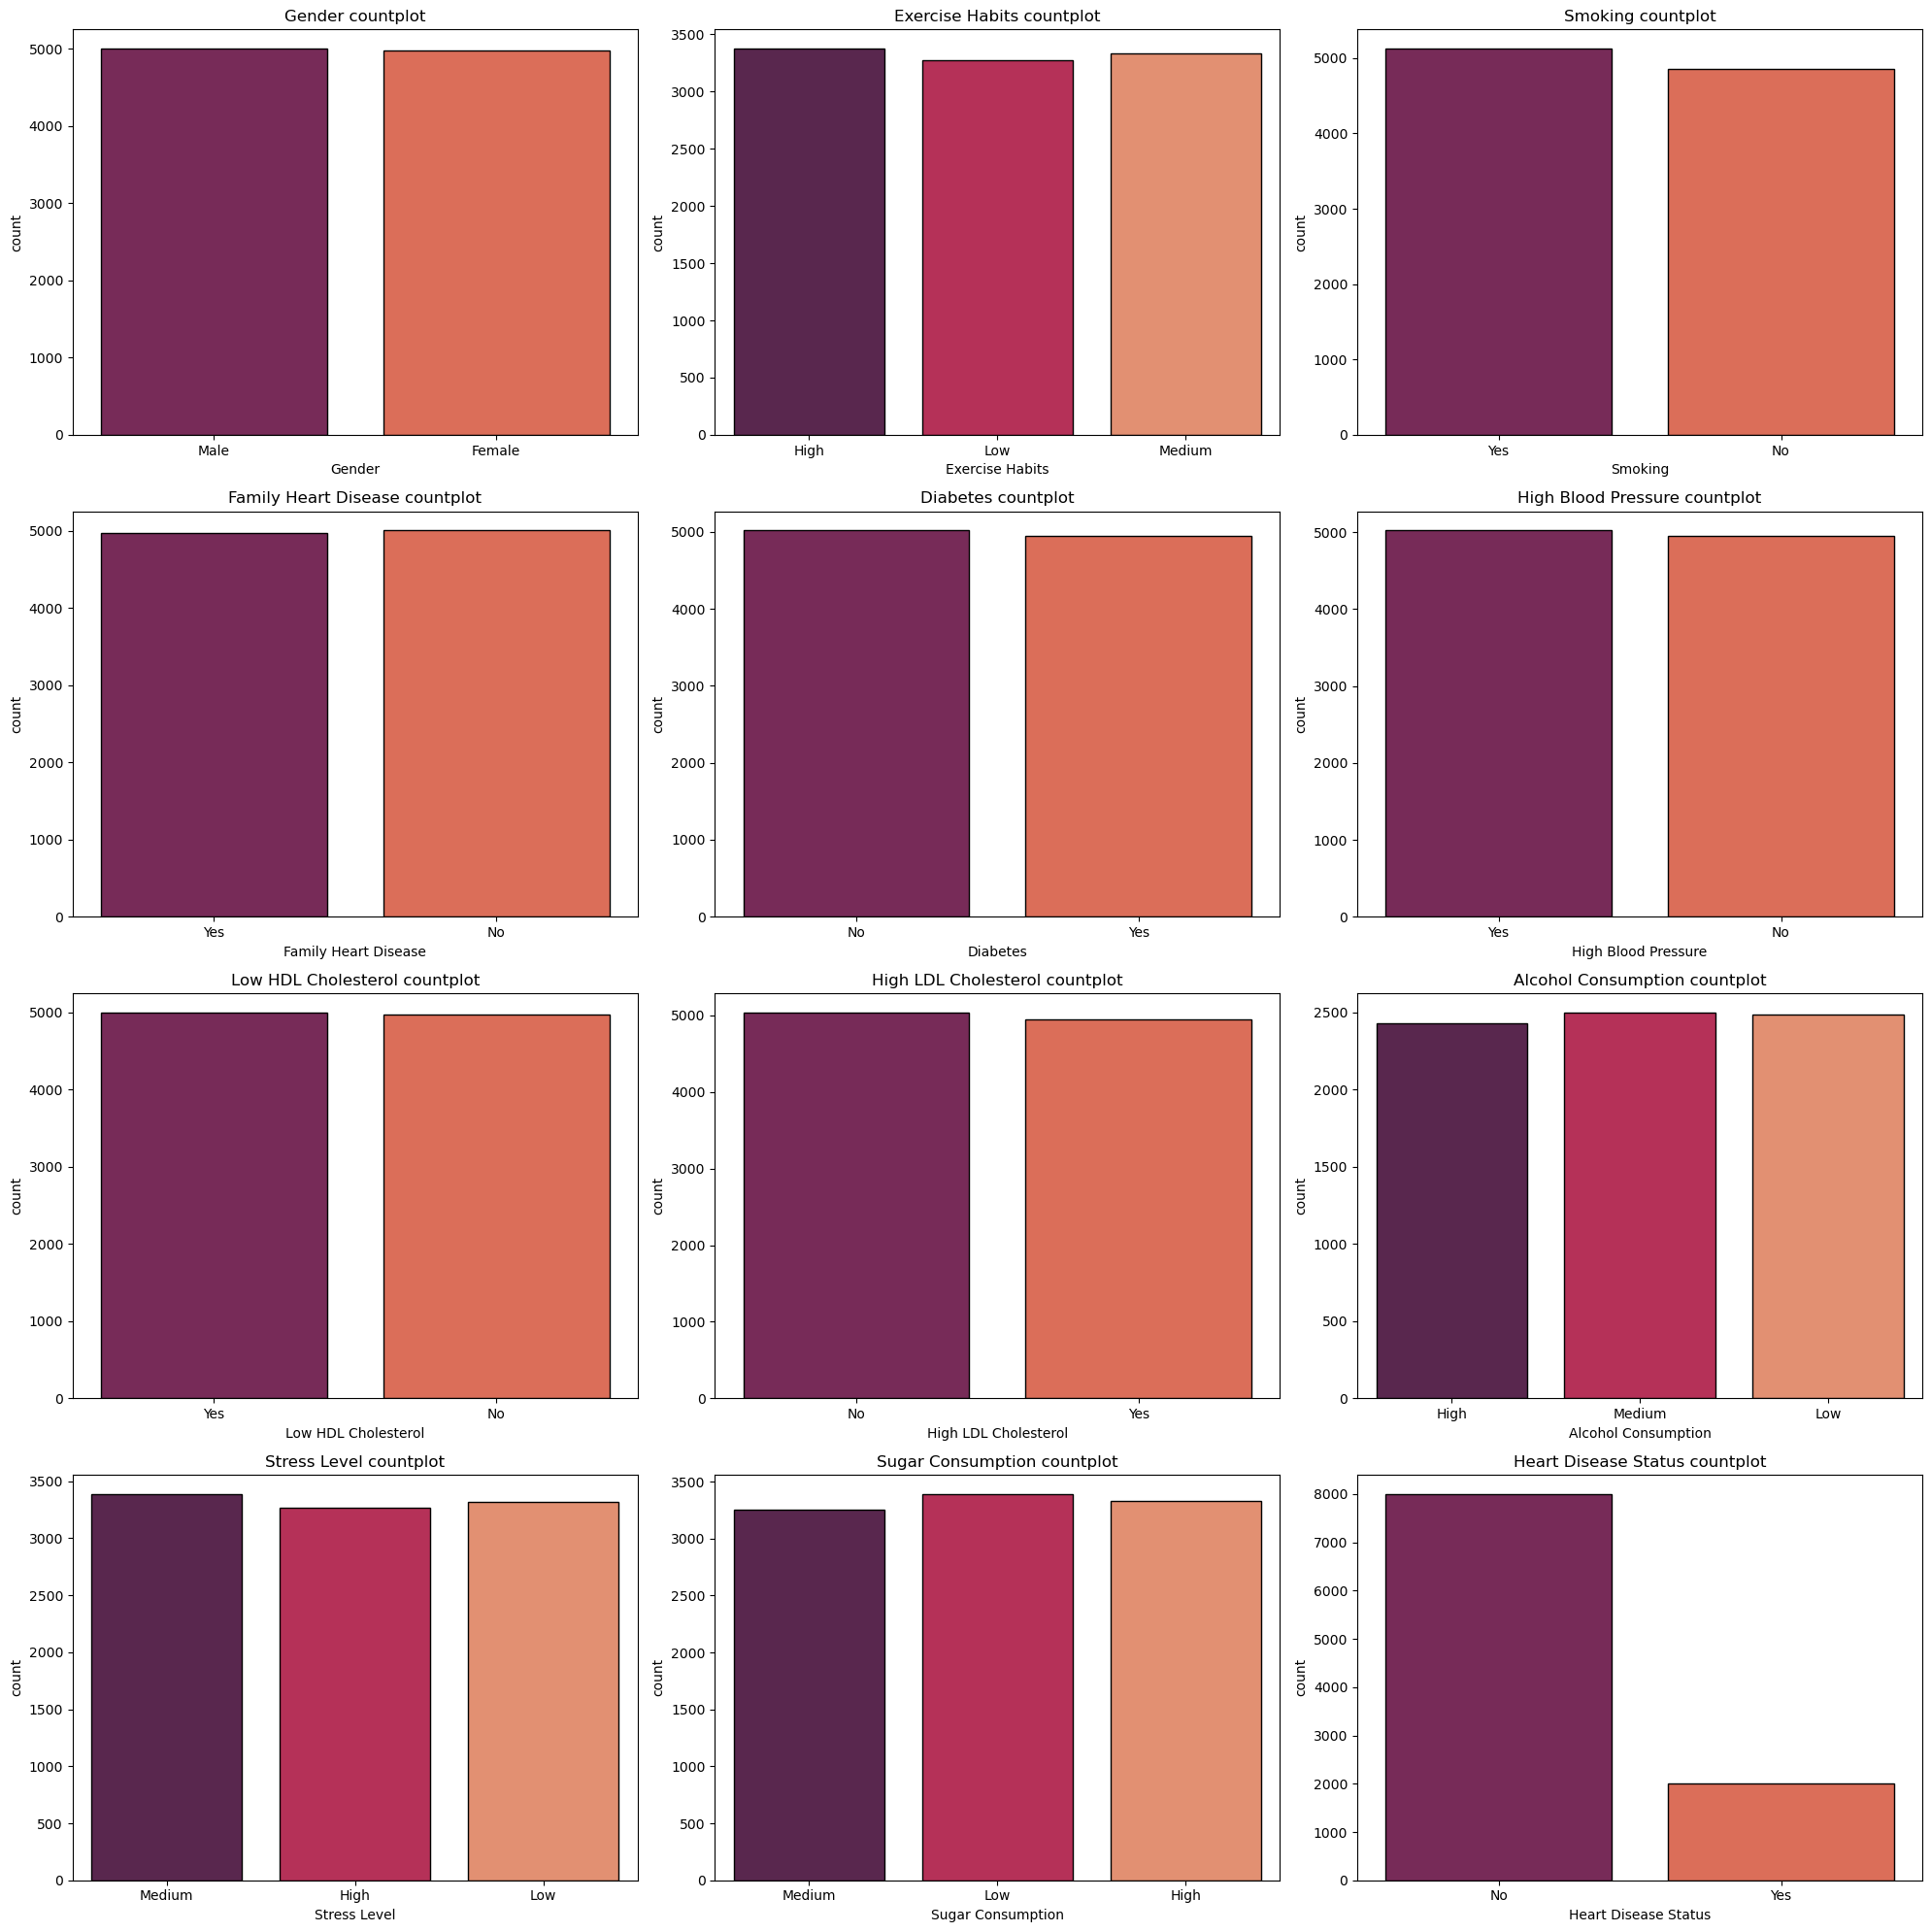

In [173]:
Plot_Categorical_features(df)

### Categorical Features Distribution Insights

An analysis of the categorical features provides important insights into class balance, representation of risk factors, and the overall suitability of the dataset for classification modeling.

### 1. Gender
The gender distribution is nearly balanced between male and female participants. This balanced representation reduces gender-related bias and allows for reliable comparative analysis across genders in heart disease prediction.

### 2. Exercise Habits
Exercise habits are evenly distributed across high, medium, and low categories. This indicates sufficient variability in physical activity levels, enabling effective evaluation of exercise as a protective or risk-related factor.

### 3. Smoking Status
The dataset shows a comparable number of smokers and non-smokers. This balanced distribution supports meaningful assessment of smoking as a major cardiovascular risk factor without class dominance.

### 4. Family History of Heart Disease
Approximately half of the individuals report a family history of heart disease. This highlights the relevance of genetic predisposition and supports its inclusion as a key explanatory variable.

### 5. Diabetes Status
Diabetic and non-diabetic individuals are almost equally represented. Given the strong association between diabetes and cardiovascular disease, this feature provides significant predictive value.

### 6. High Blood Pressure
The presence and absence of high blood pressure are evenly distributed. This balance reinforces high blood pressure as a critical and unbiased predictor of heart disease risk.

### 7. Low HDL Cholesterol
Individuals with and without low HDL cholesterol appear in similar proportions. Since HDL cholesterol plays a protective role, this feature is important for differentiating cardiovascular risk levels.

### 8. High LDL Cholesterol
High and normal LDL cholesterol levels are nearly equally represented. This supports its importance as a metabolic risk factor associated with atherosclerosis and heart disease.

### 9. Alcohol Consumption
Alcohol consumption levels (low, medium, high) are uniformly distributed across the dataset. This allows for robust analysis of both beneficial and adverse effects of alcohol intake on heart health.

### 10. Stress Level
Stress levels show a balanced distribution across low, medium, and high categories. This suggests adequate representation of psychosocial stress factors relevant to cardiovascular health.

### 11. Sugar Consumption
Sugar consumption categories are evenly represented, indicating consistent dietary patterns across the population. This feature can therefore be reliably analyzed as a lifestyle-related risk factor.

### 12. Heart Disease Status (Target Variable)
The target variable exhibits noticeable class imbalance, with a significantly larger number of individuals without heart disease. This imbalance may bias model predictions and should be addressed using techniques such as resampling, class weighting, or advanced evaluation metrics.

### Summary
Overall, the categorical features demonstrate well-balanced distributions, indicating high data quality and suitability for machine learning applications. The primary concern lies in the imbalance of the target variable, which must be handled appropriately to ensure robust and unbiased predictive performance.


## Indiviual Features & With Target

### Age

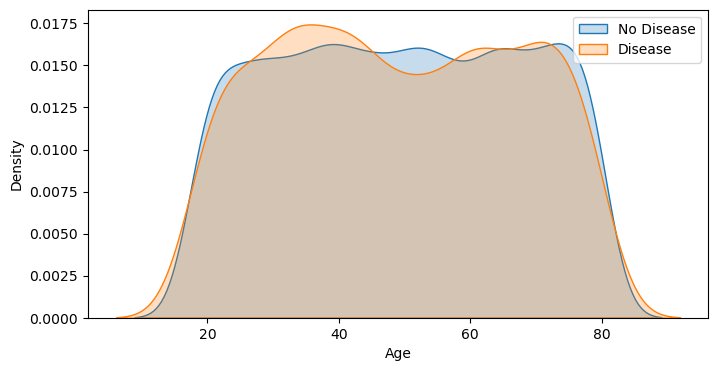

In [174]:
plt.figure(figsize=(8,4))
sns.kdeplot(df[df['Heart Disease Status']=="No"]["Age"], label='No Disease', fill=True)
sns.kdeplot(df[df['Heart Disease Status']=="Yes"]["Age"], label='Disease', fill=True)
plt.legend()
plt.show()


#### Age Distribution by Heart Disease Status

The density plot illustrates the age distribution for individuals with and without heart disease. Both groups show a wide age range, indicating that heart disease is observed across nearly all adult age categories in the dataset. However, a noticeable shift in density can be observed toward middle-aged and older individuals in the heart disease group.

Individuals without heart disease show relatively higher density in younger age ranges, while those with heart disease exhibit slightly increased density in the higher age intervals. This pattern aligns with established medical understanding that the risk of heart disease generally increases with age.

### BMI

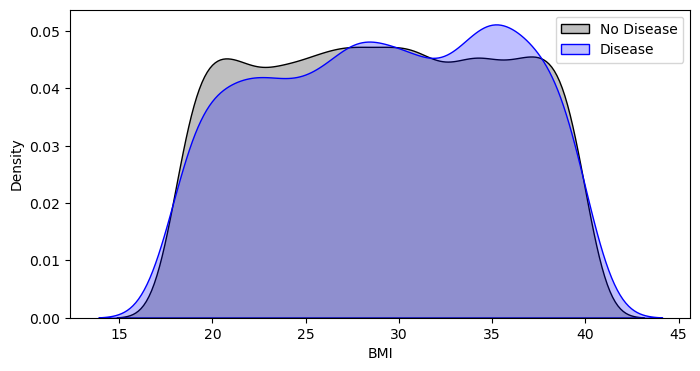

In [175]:
plt.figure(figsize=(8,4))
sns.kdeplot(df[df['Heart Disease Status']=="No"]["BMI"], label='No Disease', fill=True, color="black")
sns.kdeplot(df[df['Heart Disease Status']=="Yes"]["BMI"], label='Disease', fill=True,color="blue")
plt.legend()
plt.show()

#### BMI Distribution by Heart Disease Status

The density plot compares the Body Mass Index (BMI) distribution between individuals with and without heart disease. Both groups span a similar BMI range, indicating that individuals across normal, overweight, and obese categories are present in both populations. However, the heart disease group shows a slightly higher density in the overweight and obese ranges compared to the non-disease group.

In contrast, individuals without heart disease tend to have relatively higher density in the lower BMI range, particularly within the normal weight category. This suggests that increased BMI may be associated with a higher likelihood of heart disease.

### Exercise Habits

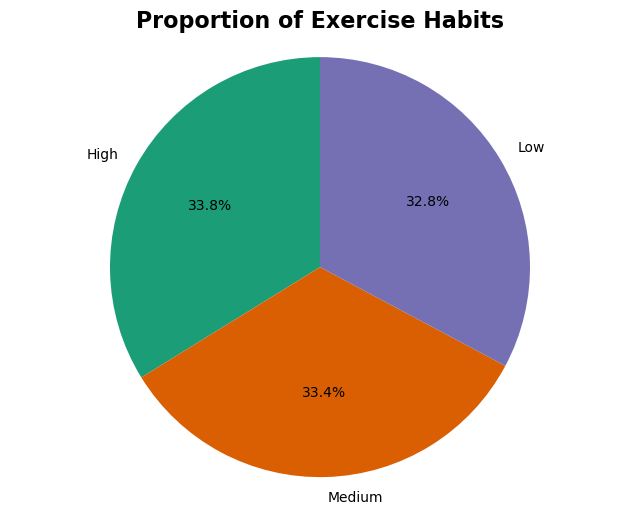

In [176]:
Exercise_counts = df["Exercise Habits"].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(Exercise_counts, 
        labels=Exercise_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plt.cm.Dark2.colors)

plt.title('Proportion of Exercise Habits', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

#### Exercise Habits analysis

The distribution of exercise habits is nearly uniform across the three categories (Low, Medium, and High), with each class representing approximately one-third of the dataset. This balanced proportion indicates the absence of class imbalance, which is beneficial for machine learning models as it reduces bias toward a particular activity level.

From a predictive perspective, this feature provides adequate representation of all exercise intensity levels, allowing the model to effectively learn potential non-linear relationships between physical activity and heart disease risk. 


### Stress Level & Target

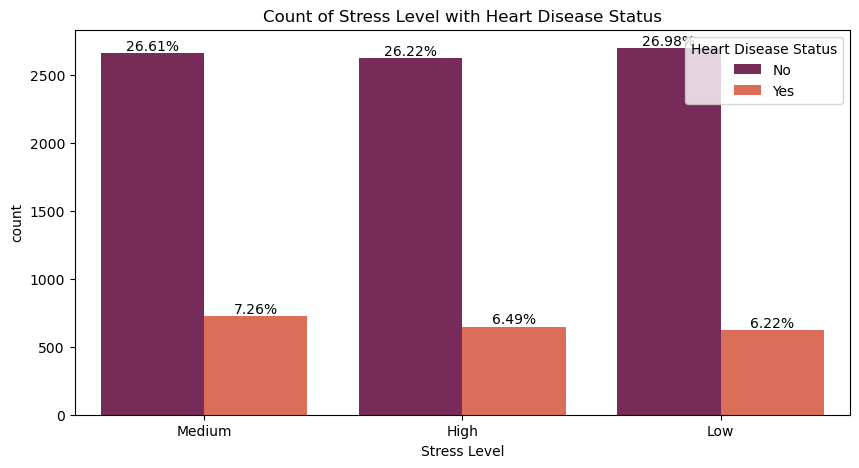

In [177]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x='Stress Level', data=df, palette='rocket',hue="Heart Disease Status")

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2, height, 
                f'{height/len(df)*100:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Count of Stress Level with Heart Disease Status')
plt.show()

#### Stress Level vs. Heart Disease Status

The distribution of stress levels across heart disease outcomes shows a relatively consistent pattern, with the majority of individuals in each stress category belonging to the non–heart disease group. However, a subtle variation is observed in the proportion of heart disease cases across stress levels. Individuals reporting **medium stress levels** exhibit a slightly higher proportion of heart disease cases compared to those in the high and low stress categories.

### Alcohol Consumption & Target

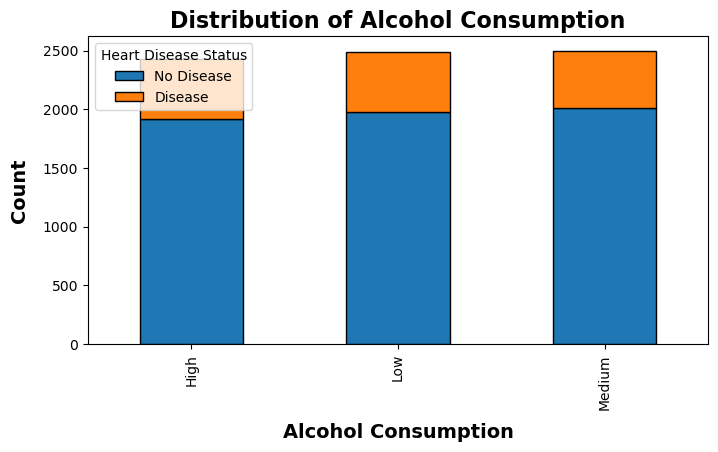

In [178]:
Alcohol_counts = df.groupby(["Alcohol Consumption", "Heart Disease Status"]).size().unstack()

Alcohol_counts.plot(kind="bar", stacked=True, figsize=(8, 4), color=['#1f77b4', '#ff7f0e'], edgecolor="black")

plt.xlabel("Alcohol Consumption", fontsize=14, labelpad=10, fontweight="bold")
plt.ylabel("Count", fontsize=14, labelpad=10, fontweight="bold")
plt.title("Distribution of Alcohol Consumption", fontsize=16, fontweight="bold")
plt.legend(title="Heart Disease Status", labels=["No Disease", "Disease"])
plt.show()

#### Alcohol Consumption vs. Heart Disease Status

The distribution of alcohol consumption shows that the **medium consumption** group constitutes the largest portion of the dataset, followed by low and high consumption levels. Across all categories, individuals without heart disease dominate; however, the proportion of heart disease cases is relatively higher in the **high alcohol consumption** group compared to the low and medium groups.

### Gender & Target

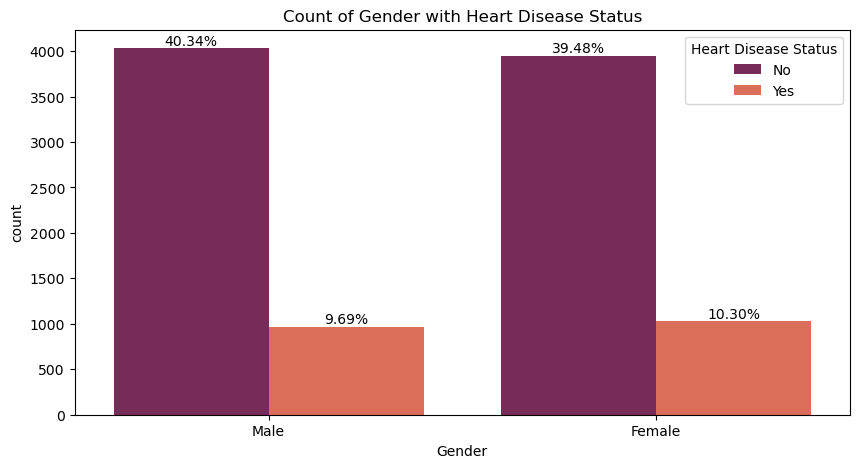

In [179]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x='Gender', data=df, palette='rocket',hue="Heart Disease Status")

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2, height, 
                f'{height/len(df)*100:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Count of Gender with Heart Disease Status')
plt.show()

#### Gender Distribution and Heart Disease Status

The plot illustrates the distribution of heart disease cases across gender categories. It is observed that both males and females have a significantly higher number of individuals **without heart disease** compared to those **with heart disease**, indicating an overall class imbalance in the dataset toward non-diseased cases.

For males, approximately **40.52%** of the total dataset corresponds to individuals without heart disease, while **9.70%** represent males diagnosed with heart disease. Similarly, females account for about **39.48%** without heart disease and **10.30%** with heart disease. This suggests that the proportion of heart disease cases is relatively comparable between genders, with females showing a slightly higher percentage of diagnosed cases.

### Family Heart Disease & Target

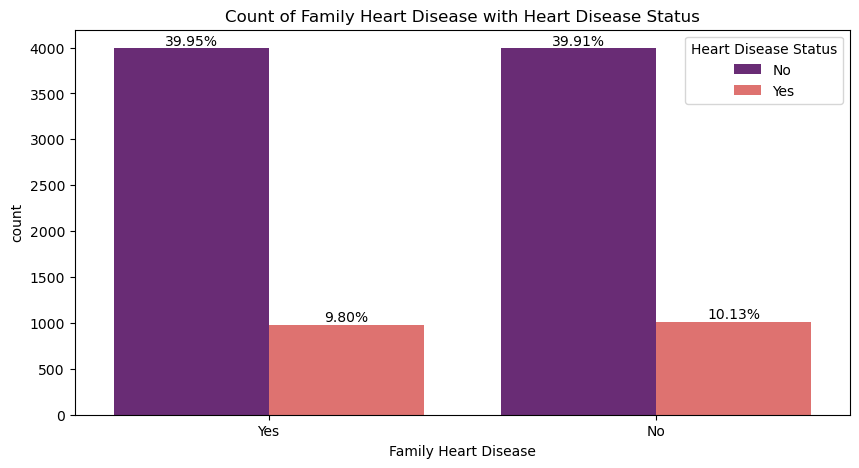

In [180]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x='Family Heart Disease', data=df, palette='magma',hue="Heart Disease Status")

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2, height, 
                f'{height/len(df)*100:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Count of Family Heart Disease with Heart Disease Status')
plt.show()

#### Family History of Heart Disease and Disease Status

The plot presents the relationship between family history of heart disease and the presence of heart disease in individuals. It can be observed that individuals **with** and **without** a family history of heart disease exhibit very similar distributions in terms of heart disease status.

Approximately **39.95%** of individuals with a family history of heart disease do not have the disease, while **9.80%** of them are diagnosed with heart disease. Similarly, among individuals without a family history, about **40.05%** are disease-free and **10.20%** are affected by heart disease. This indicates only a marginal difference in disease prevalence between the two groups.

### Sugar Consumption & Target

In [181]:
prop_df = (
    df.groupby(["Sugar Consumption", "Heart Disease Status"])
    .size()
    .to_frame("Count")
    .reset_index()
)

prop_df["Proportion"] = (
    prop_df.groupby("Sugar Consumption")["Count"]
    .transform(lambda x: x / x.sum())
)

fig = px.bar(
    prop_df,
    x="Sugar Consumption",
    y="Proportion",
    color="Heart Disease Status",
    barmode="group",
    labels={
        "Sugar Consumption": "Sugar Consumption",
        "Proportion": "Proportion"
    },
    color_discrete_map={
        "No": "#1f77b4",
        "Yes": "#d62728"
    }
)

fig.update_layout(
    title=dict(
        text="Proportion of Heart Disease by Sugar Consumption Level",
        font=dict(size=24, family="Arial", color="black")
    ),
    xaxis=dict(
        title_font=dict(size=20),
        tickfont=dict(size=16)
    ),
    yaxis=dict(
        title_font=dict(size=20),
        tickfont=dict(size=16),
        range=[0, 1]
    )
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()


#### Sugar Consumption Level and Heart Disease Proportion

The plot illustrates the proportion of individuals with and without heart disease across different levels of sugar consumption (Low, Medium, and High). Across all categories, the majority of individuals are observed to be **free from heart disease**, accounting for approximately **80%** of each group, while around **20%** are diagnosed with heart disease.

Notably, the proportion of heart disease remains **nearly constant across all sugar consumption levels**, indicating no clear increasing or decreasing trend as sugar intake changes. Individuals with high sugar consumption exhibit a heart disease proportion comparable to those with medium or low consumption.

## Integrated Plots

### BMI & Target

In [182]:
px.violin(
    df,
    x="Heart Disease Status",
    y="BMI",
    box=True,
    title="BMI Distribution by Heart Disease Status"
).show()

#### BMI Distribution by Heart Disease Status

**Observation:**
- The BMI distributions for individuals **with** and **without** heart disease show substantial overlap.
- The median BMI for both groups appears to be approximately in the range of **28–30**, indicating a predominance of overweight individuals.
- Individuals with heart disease exhibit a slightly wider spread toward higher BMI values, extending more frequently into the obese range (BMI > 30).
- The overall shape of both distributions suggests multimodality, indicating heterogeneity within each group.

**Insight:**
- While BMI alone does not clearly separate individuals with and without heart disease, higher BMI values are more commonly observed among patients with heart disease.
- This suggests that elevated BMI may act as a **contributing risk factor** rather than a decisive indicator.
- The overlap implies that heart disease is influenced by multiple interacting factors beyond body mass alone.


### BMI & Cholestrol & Target

In [183]:
px.density_contour(
    df,
    x="BMI",
    y="Cholesterol Level",
    color="Heart Disease Status",
    title="Density of BMI and Cholesterol by Heart Disease"
).show()

#### Density of BMI and Cholesterol by Heart Disease Status
- The joint density distributions of BMI and cholesterol for individuals with and without heart disease show a high degree of overlap.
- Both groups span a similar BMI range (approximately 18–42) and cholesterol range (approximately 150–310).
- Individuals with heart disease exhibit slightly higher density concentrations in regions with **moderate to high BMI (≈28–38)** and **elevated cholesterol levels (≈220–280)**.
- The contour patterns indicate a dispersed distribution rather than a single dominant cluster, suggesting variability in the relationship between BMI and cholesterol.
- No clear linear boundary separates the two groups based solely on these two variables.


### Smoking & Gender & Target

In [184]:

df_clean = df.dropna(subset=["Gender"])

fig = px.histogram(
    df_clean,
    x="Smoking",
    color="Heart Disease Status",
    facet_col="Gender",
    barnorm="percent",
    barmode="group",
    title="Smoking and Heart Disease Risk by Gender",
    labels={
        "Smoking": "Smoking Status",
        "Heart Disease Status": "Heart Disease Status",
        "percent": "Percentage"
    }
)

fig.update_layout(
    title_font=dict(size=22, family="Arial", weight="bold"),
    xaxis_title_font=dict(size=16),
    yaxis_title_font=dict(size=16),
    legend_title_font=dict(size=14)
)

fig.show()


#### Smoking Status and Heart Disease by Gender
- For both males and females, the proportion of individuals without heart disease is notably higher than those with heart disease, regardless of smoking status.
- Among males, the percentage of heart disease cases is slightly higher for smokers compared to non-smokers, although the difference is relatively small.
- Among females, a similar pattern is observed, with smokers showing a marginally higher proportion of heart disease cases than non-smokers.


### Exercise & Age & Target

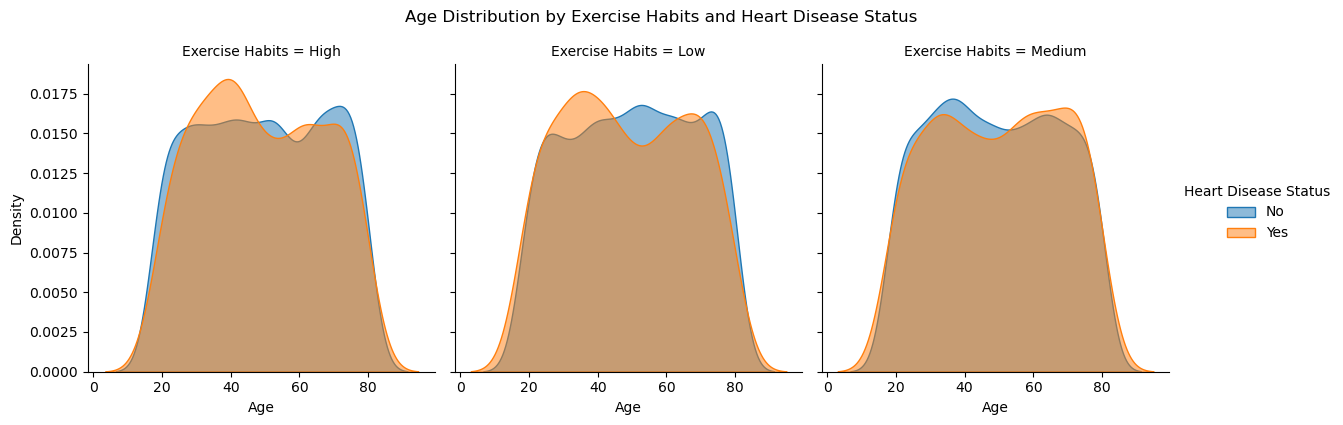

In [185]:
g = sns.FacetGrid(
    df,
    col="Exercise Habits",
    hue="Heart Disease Status",
    height=4,
    aspect=1
)
g.map(sns.kdeplot, "Age", fill=True, alpha=0.5)
g.add_legend()
g.fig.suptitle("Age Distribution by Exercise Habits and Heart Disease Status", y=1.05)
plt.show()


#### Age Distribution by Exercise Habits and Heart Disease Status


- The age distributions for individuals with and without heart disease show substantial overlap across all exercise habit categories (High, Medium, and Low). However, a slight shift toward higher ages is observed among individuals with heart disease, particularly in the **Medium** and **Low** exercise groups.
- Age is broadly distributed between approximately 20 and 80 years across all exercise levels.


### Sleep Hours & Gender & Target

In [186]:
df_clean = df.dropna(subset=["Gender"])
fig = px.violin(
    df_clean,
    x="Heart Disease Status",
    y="Sleep Hours",
    color="Heart Disease Status",
    facet_col="Gender",
    box=True,
    points="outliers",
    title="Sleep Hours Distribution by Gender and Heart Disease Status"
)

fig.show()


#### Sleep Hours Distribution by Gender and Heart Disease Status

- For both **males and females**, sleep duration generally ranges between **4 and 10 hours**, regardless of heart disease status.
- The **median sleep hours** for individuals with heart disease are comparable to those without heart disease in each gender group.
- Slight differences in distribution width suggest marginal variability, but no clear separation between the two groups.

### Alcohol & Stress & Target

In [187]:
df_cleaned=df.dropna(subset=["Stress Level"])
fig = px.histogram(
    df_cleaned,
    x="Alcohol Consumption",
    color="Heart Disease Status",
    facet_col="Stress Level",
    barmode="group",
    title="Alcohol Consumption and Stress Level vs Heart Disease Status",
    labels={
        "Alcohol Consumption": "Alcohol Consumption Level",
        "count": "Number of Patients",
        "Heart Disease Status": "Heart Disease Status",
        "Stress Level": "Stress Level"
    }
)

fig.update_layout(
    title_font=dict(size=22, family="Arial", color="black", weight="bold"),
    xaxis_tickangle=-45,
    legend_title_font=dict(size=14)
)

fig.show()


#### Alcohol Consumption and Stress Level vs Heart Disease Status

Across all stress levels (Low, Medium, and High), individuals without heart disease consistently outnumber those with heart disease for every alcohol consumption category. Nevertheless, variations in the proportion of heart disease cases are observable when alcohol consumption and stress levels are considered jointly.

- For **medium stress levels**, heart disease cases appear slightly more frequent among individuals with **high alcohol consumption** compared to low and medium consumption.
- Under **high stress**, the count of heart disease cases increases modestly for **low and medium alcohol consumption**, suggesting stress may play a stronger role than alcohol alone.
- In the **low stress** group, heart disease counts remain relatively stable across all alcohol consumption levels, indicating limited differentiation.

#
<a id='1'></a>

<p style="
    background: linear-gradient(to right, #5C4033, #8B5A2B); 
    font-family: 'Times New Roman', serif; 
    color: #F5DEB3; 
    font-size: 30px; 
    text-align: center; 
    border-radius: 12px; 
    padding: 12px; 
    border: 3px solid #D2B48C;
    box-shadow: 2px 2px 10px rgba(210, 180, 140, 0.5);
    font-weight: bold;
    letter-spacing: 1px;
">
    Data Preprocessing 
</p>


In [188]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,Age,float64,"[71.0, 64.0, 43.0, 34.0, 62.0, 72.0, 66.0, 76....",63,29,0.29,0
1,Gender,object,"[Male, Female]",2,19,0.19,0
2,Blood Pressure,float64,"[134.0, 167.0, 171.0, 140.0, 142.0, 170.0, 133...",61,19,0.19,0
3,Cholesterol Level,float64,"[292.0, 186.0, 288.0, 185.0, 193.0, 255.0, 162...",151,30,0.30,0
4,Exercise Habits,object,"[High, Medium, Low]",3,25,0.25,0
5,Smoking,object,"[Yes, No]",2,25,0.25,0
6,Family Heart Disease,object,"[No, Yes]",2,21,0.21,0
7,Diabetes,object,"[No, Yes]",2,30,0.30,0
8,BMI,float64,"[24.991591091690363, 37.9932729831996, 22.6497...",9978,22,0.22,0
9,High Blood Pressure,object,"[Yes, No]",2,26,0.26,0


### Handling Nulls

#### 1- Numerical Columns

In [189]:
Numerical_columns=df.select_dtypes(include=["number"]).columns.tolist()
df[Numerical_columns]= df[Numerical_columns].fillna(df[Numerical_columns].median())

#### 2- Categorical Columns

##### Handling Missing Values in Alcohol Consumption

The Alcohol Consumption feature contains approximately 25% missing values. Instead of removing this feature directly, it was retained due to its relevance as a lifestyle factor associated with heart disease. Missing values were treated as a separate category to preserve potential information and avoid introducing bias through aggressive imputation. Model performance was later evaluated with and without this feature to assess its contribution.


In [190]:
Categorical_columns=df.select_dtypes(include=["object"]).columns.tolist()
df[Categorical_columns]= df[Categorical_columns].fillna(df[Categorical_columns].mode().iloc[0])

In [191]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,Age,float64,"[49.0, 71.0, 64.0, 43.0, 34.0, 62.0, 72.0, 66....",63,0,0.0,0
1,Gender,object,"[Male, Female]",2,0,0.0,0
2,Blood Pressure,float64,"[134.0, 167.0, 150.0, 171.0, 140.0, 142.0, 170...",61,0,0.0,0
3,Cholesterol Level,float64,"[226.0, 292.0, 186.0, 288.0, 185.0, 193.0, 255...",151,0,0.0,0
4,Exercise Habits,object,"[High, Medium, Low]",3,0,0.0,0
5,Smoking,object,"[Yes, No]",2,0,0.0,0
6,Family Heart Disease,object,"[No, Yes]",2,0,0.0,0
7,Diabetes,object,"[No, Yes]",2,0,0.0,0
8,BMI,float64,"[29.079491590086043, 24.991591091690363, 18.05...",9979,0,0.0,0
9,High Blood Pressure,object,"[Yes, No]",2,0,0.0,0


### Handling Outliers

In [192]:
def Chech_outliers(data):
    Numerical_columns=data.select_dtypes(include=["number"]).columns
    total_cols=3
    total_rows=math.ceil(len(Numerical_columns)/total_cols)
    plt.figure(figsize=(20, 5*total_rows))

    idx=1

    for col in Numerical_columns:
        plt.subplot(total_rows, total_cols, idx)
        sns.boxplot(data=df, y=col, palette='magma',whis=1.5)
        plt.title(f"{col} boxplot")
        idx+=1

    plt.tight_layout()
    plt.show()

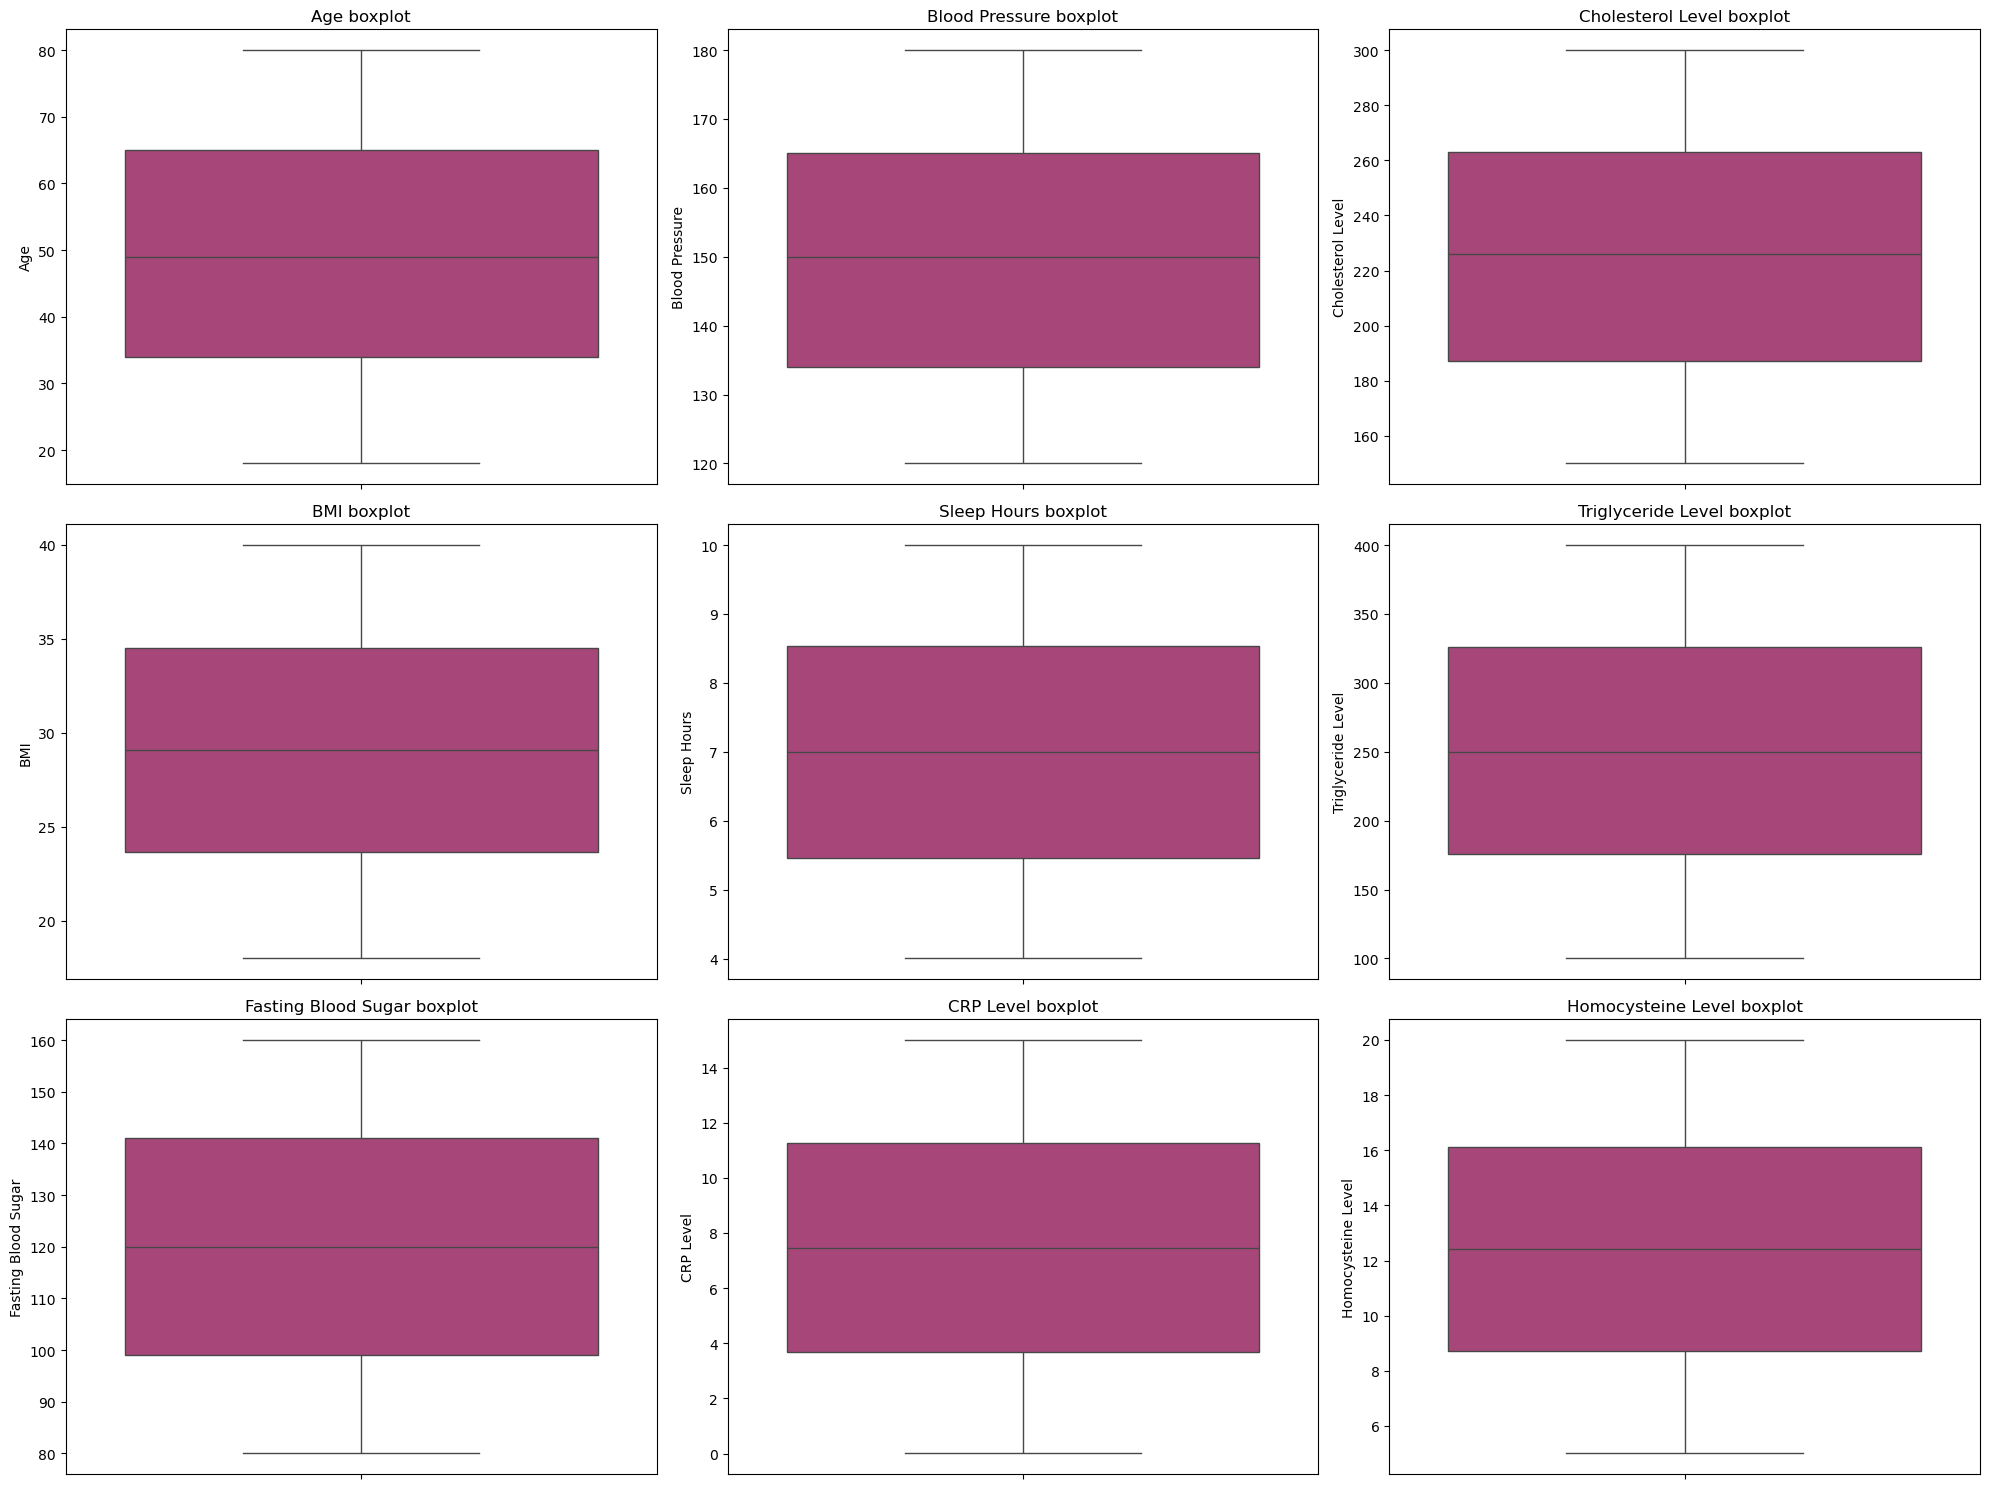

In [193]:
Chech_outliers(df)

#### Outliers Analysis

The analysis showed that the majority of numerical variables follow well-balanced distributions without extreme or abnormal values. No significant outliers were observed that could negatively affect model training or bias the results.

Based on this observation, no outlier removal or transformation was applied, and all numerical features were retained in their original form to preserve the natural variability of the data.


### Feature Engineering

#### 1- Age Groups

In [194]:
def age_group(age):
    if age < 40:
        return 'Young'
    elif 40 <= age <= 59:
        return 'Middle_Aged'
    else:
        return 'Senior'

df['Age_Group'] = df['Age'].apply(age_group)

In [195]:
df["Age_Group"].value_counts()

Age_Group
Young          3439
Senior         3394
Middle_Aged    3167
Name: count, dtype: int64

#### 2- Blood Pressure Category

In [196]:
def Blood_Pressure_Category(blood):
    if 120 <= blood < 129:
        return 'Normal'
    elif 130 <= blood < 139:
        return 'Elevated'
    else:
        return 'High'
    
df["Blood_Pressure_Category"]= df["Blood Pressure"].apply(Blood_Pressure_Category)

In [197]:
df["Blood_Pressure_Category"].value_counts()

Blood_Pressure_Category
High        6996
Elevated    1511
Normal      1493
Name: count, dtype: int64

#### 3- Cholesterol Level Category

In [198]:
def Cholesterol_Level_category(chol):
    if chol < 200:
        return 'Desirable'
    elif 200 <= chol < 239:
        return 'Borderline_High'
    else:
        return 'High'

df['Cholesterol_Category'] = df['Cholesterol Level'].apply(Cholesterol_Level_category)

In [199]:
df["Cholesterol_Category"].value_counts()  

Cholesterol_Category
High               4127
Desirable          3285
Borderline_High    2588
Name: count, dtype: int64

#### 4- BMI Category

In [200]:
def BMI_category(bmi):
    if 18 <= bmi < 24.9:
        return 'Normal_weight'
    elif 24.9 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

df['BMI_Category'] = df['BMI'].apply(BMI_category)

In [201]:
df["BMI_Category"].value_counts()

BMI_Category
Obesity          4622
Normal_weight    3008
Overweight       2370
Name: count, dtype: int64

#### 5- Life Style

In [202]:
def LifeStyle(smoking, alcohol, exercise, sugar):
    score = 0

    score += 1 if smoking == 'Yes' else 0
    score += 2 if alcohol == 'High' else 1 if alcohol == 'Medium' else 0
    score += 2 if exercise == 'Low' else 1 if exercise == 'Medium' else 0
    score += 2 if sugar == 'High' else 1 if sugar == 'Medium' else 0

    return score

df["life_style_score"]= df.apply(lambda x: LifeStyle(x['Smoking'],x['Alcohol Consumption'],
                                                     x['Exercise Habits'],x['Sugar Consumption']), axis=1)

In [203]:
df["life_style_score"].value_counts()

life_style_score
3    2536
4    2456
2    1686
5    1654
6     709
1     688
0     149
7     122
Name: count, dtype: int64

#### 6- Sleep Quality

In [204]:
def sleep_Quality(sleep):
    if 6 > sleep:
        return 'Poor'
    elif sleep > 9:
        return 'Poor'
    else:
        return 'Good'

df['Sleep_Quality'] = df['Sleep Hours'].apply(sleep_Quality)

In [205]:
df['Sleep_Quality'].value_counts()

Sleep_Quality
Poor    5078
Good    4922
Name: count, dtype: int64

### 

In [206]:
df["life_style_score"]=df["life_style_score"].astype('object')
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,Age,float64,"[49.0, 71.0, 64.0, 43.0, 34.0, 62.0, 72.0, 66....",63,0,0.0,0
1,Gender,object,"[Male, Female]",2,0,0.0,0
2,Blood Pressure,float64,"[134.0, 167.0, 150.0, 171.0, 140.0, 142.0, 170...",61,0,0.0,0
3,Cholesterol Level,float64,"[226.0, 292.0, 186.0, 288.0, 185.0, 193.0, 255...",151,0,0.0,0
4,Exercise Habits,object,"[High, Medium, Low]",3,0,0.0,0
5,Smoking,object,"[Yes, No]",2,0,0.0,0
6,Family Heart Disease,object,"[No, Yes]",2,0,0.0,0
7,Diabetes,object,"[No, Yes]",2,0,0.0,0
8,BMI,float64,"[29.079491590086043, 24.991591091690363, 18.05...",9979,0,0.0,0
9,High Blood Pressure,object,"[Yes, No]",2,0,0.0,0


### Split Data

In [207]:
X=df.drop('Heart Disease Status', axis=1)
y=df['Heart Disease Status']

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Encoding

In [209]:
temp_cat=['Age_Group', 'Blood_Pressure_Category', 'Cholesterol_Category', 'BMI_Category', 'Sleep_Quality']
Categorical_columns=Categorical_columns + temp_cat

Categorical_columns.remove('Heart Disease Status')

#### Binary Encoder

In [210]:
Binary_Columns=['Gender','Smoking', 'Family Heart Disease','Diabetes', 
                "High Blood Pressure", "Low HDL Cholesterol","High LDL Cholesterol","Sleep_Quality"]

binary_encoders = {}

for col in Binary_Columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    binary_encoders[col] = le


#### Ordinal Encoder

In [211]:
Ordinal_Columns=["Exercise Habits",'Alcohol Consumption', "Stress Level",'Sugar Consumption', "Age_Group",
                 "Blood_Pressure_Category","Cholesterol_Category","BMI_Category"]

ordinal_mapping={
    "Exercise Habits": {'High':0, 'Medium':1, 'Low':2},
    "Alcohol Consumption": {'Low':0, 'Medium':1, 'High':2},
    "Stress Level": {'Low':0, 'Medium':1, 'High':2},
    "Sugar Consumption": {'Low':0, 'Medium':1, 'High':2},
    "Age_Group": {'Young':0, 'Middle_Aged':1, 'Senior':2},
    "Blood_Pressure_Category": {'Normal':0, 'Elevated':1, 'High':2},
    "Cholesterol_Category": {'Desirable':0, 'Borderline_High':1, 'High':2},
    "BMI_Category": {'Normal_weight':0, 'Overweight':1, 'Obesity':2}
}

ordinal_encoder=OrdinalEncoder(mapping=[{'col':col, 'mapping':ordinal_mapping[col]} for col in Ordinal_Columns])

X_train[Ordinal_Columns]=ordinal_encoder.fit_transform(X_train[Ordinal_Columns])
X_test[Ordinal_Columns]=ordinal_encoder.transform(X_test[Ordinal_Columns])

#### Target Encoder

In [212]:
Target_encoder=LabelEncoder()
y_train=Target_encoder.fit_transform(y_train)
y_test=Target_encoder.transform(y_test)

Categorical features were encoded based on their semantic meaning. Binary variables were label-encoded to preserve simplicity and interpretability. Ordered categorical variables were ordinally encoded to reflect their inherent ranking and associated health risk. One-hot and binary encoders were avoided to prevent unnecessary dimensionality expansion and to maintain model efficiency.


### Balancing Data

In [213]:
print(y_train[y_train==0].shape)
print(y_train[y_train==1].shape)

(6400,)
(1600,)


In [214]:
resampler = SMOTE(random_state=42)

X_train, y_train = resampler.fit_resample(X_train, y_train)
X_test, y_test = resampler.fit_resample(X_test, y_test)

In [215]:
print(y_train[y_train==0].shape)
print(y_train[y_train==1].shape)

(6400,)
(6400,)


### Scaling

In [216]:
scaler=MinMaxScaler()

X_train[Numerical_columns]=scaler.fit_transform(X_train[Numerical_columns])
X_test[Numerical_columns]=scaler.transform(X_test[Numerical_columns])


### Correlation

#### Numerical Features

In [217]:
pb_results = {}

for col in Numerical_columns:
    corr, p_value = pointbiserialr(y_train, X_train[col])
    pb_results[col] = {'correlation': corr, 'p_value': p_value}

pb_df = pd.DataFrame(pb_results).T.sort_values(
    by='correlation', key=abs, ascending=False
)

pb_df

,correlation,p_value
BMI,0.051310,6.311899e-09
Age,-0.018591,3.543632e-02
Fasting Blood Sugar,-0.015259,8.429056e-02
Sleep Hours,-0.011577,1.902961e-01
CRP Level,0.007987,3.662072e-01
Triglyceride Level,-0.004520,6.091438e-01
Blood Pressure,-0.001908,8.291456e-01
Homocysteine Level,0.001768,8.414960e-01
Cholesterol Level,0.001108,9.002220e-01


#### Binary Features

In [218]:
chi_results = {}

for col in Binary_Columns:
    contingency = pd.crosstab(X_train[col], y_train)
    chi2, p, dof, expected = chi2_contingency(contingency)
    chi_results[col] = {'chi2': chi2, 'p_value': p}

chi_df = pd.DataFrame(chi_results).T.sort_values('chi2', ascending=False)

chi_df

,chi2,p_value
Gender,632.295120,1.583635e-139
Sleep_Quality,516.819055,2.082585e-114
High Blood Pressure,505.615856,5.702783e-112
Family Heart Disease,484.639332,2.090477e-107
Diabetes,427.517247,5.639785e-95
Smoking,416.872347,1.170100e-92
Low HDL Cholesterol,412.083163,1.290263e-91
High LDL Cholesterol,407.659877,1.184444e-90


#### Ordinal Features

In [219]:
Ordinal_Columns+=["life_style_score"]
spearman_result = {}

for col in Ordinal_Columns:
    corr, p = spearmanr(X_train[col], y_train)
    spearman_result[col] = {'correlation': corr, 'p_value': p}

spearman_df = pd.DataFrame(spearman_result).T.sort_values(
    by='correlation', key=abs, ascending=False
)

Ordinal_Columns.remove("life_style_score")
spearman_df

,correlation,p_value
Alcohol Consumption,-0.166893,1.320694e-80
Exercise Habits,-0.144784,6.472943e-61
Stress Level,-0.129792,3.302582e-49
Sugar Consumption,-0.128268,4.315010e-48
Age_Group,-0.087757,2.605415e-23
BMI_Category,-0.076066,6.840618e-18
Blood_Pressure_Category,-0.053716,1.193983e-09
life_style_score,0.021537,1.482124e-02
Cholesterol_Category,-0.021503,1.498051e-02


#### Mutual Info

In [220]:
mi = mutual_info_classif(X_train, y_train, random_state=42)
mi_df = pd.DataFrame({'Feature': X_train.columns, 'Mutual_Info': mi}).sort_values(
    by='Mutual_Info', ascending=False
)
mi_df

,Feature,Mutual_Info
2,Blood Pressure,0.342240
17,Fasting Blood Sugar,0.336885
0,Age,0.336389
3,Cholesterol Level,0.325571
16,Triglyceride Level,0.289816
24,life_style_score,0.284164
5,Smoking,0.025276
1,Gender,0.024486
4,Exercise Habits,0.023706
14,Sleep Hours,0.021284


#### Deleted Columns

In [ ]:
# deleted_columns=["Sugar Consumption","Alcohol Consumption","Stress Level",
#                  "Blood_Pressure_Category","BMI_Category","Age_Group",
#                  "Cholesterol_Category","Sleep_Quality","High Blood Pressure",
#                  "Family Heart Disease","Diabetes","Low HDL Cholesterol",
#                  "CRP Level","Homocysteine Level"]

# X_train.drop(deleted_columns, axis=1, inplace=True)
# X_test.drop(deleted_columns, axis=1, inplace=True)

Correlation analyses were conducted using feature-type-appropriate statistical methods to explore linear and monotonic relationships with the target variable. However, feature selection decisions were primarily guided by mutual information scores, as they capture non-linear dependencies and interaction effects that traditional correlation measures may overlook. Final feature relevance was validated through model performance.


In [222]:
joblib.dump(X_train.columns, r'C:\Users\moham\Downloads\Amit_Course\Graduation_Project\Heart_Disease_Prediction\Models\Selected_Features.pkl')
joblib.dump(Numerical_columns, r'C:\Users\moham\Downloads\Amit_Course\Graduation_Project\Heart_Disease_Prediction\Models\Numerical_Columns.pkl')
joblib.dump(Ordinal_Columns, r'C:\Users\moham\Downloads\Amit_Course\Graduation_Project\Heart_Disease_Prediction\Models\Ordinal_Columns.pkl')
joblib.dump(Binary_Columns, r'C:\Users\moham\Downloads\Amit_Course\Graduation_Project\Heart_Disease_Prediction\Models\Binary_Columns.pkl')

['C:\\Users\\moham\\Downloads\\Amit_Course\\Graduation_Project\\Heart_Disease_Prediction\\Models\\Binary_Columns.pkl']

#
<a id='1'></a>

<p style="
    background: linear-gradient(to right, #5C4033, #8B5A2B); 
    font-family: 'Times New Roman', serif; 
    color: #F5DEB3; 
    font-size: 30px; 
    text-align: center; 
    border-radius: 12px; 
    padding: 12px; 
    border: 3px solid #D2B48C;
    box-shadow: 2px 2px 10px rgba(210, 180, 140, 0.5);
    font-weight: bold;
    letter-spacing: 1px;
">
    Model Training 
</p>


### Try PCA

In [ ]:
pca = PCA(n_components = 10, random_state=42)  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

joblib.dump(pca, 'PCA_Model.pkl')

### Logistic Regression & Grid Search

In [ ]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs']
}

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
best_log_reg = grid_search.best_estimator_

y_pred = best_log_reg.predict(X_test)
y_pred_train = best_log_reg.predict(X_train)

print("Best Parameters:", grid_search.best_params_)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

#### Logistic Regression *(best parameters)*

In [ ]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000, C = 0.01, penalty="l1" , class_weight='balanced', random_state=42)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

print("#############################################################################")
print(classification_report(y_test, y_pred))

Train Accuracy: 0.84625
Test Accuracy: 0.853125
#############################################################################
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1600
           1       1.00      0.71      0.83      1600

    accuracy                           0.85      3200
   macro avg       0.89      0.85      0.85      3200
weighted avg       0.89      0.85      0.85      3200



### SVM

In [226]:
# svm_model = SVC(probability=True, C = 100, kernel = "rbf" ,gamma = "auto", random_state=42)
# svm_model.fit(X_train, y_train)

# y_pred = svm_model.predict(X_test)
# y_pred_train = svm_model.predict(X_train)

# print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
# print("Test Accuracy:", accuracy_score(y_test, y_pred))
# print("#############################################################################")
# print(classification_report(y_test, y_pred))

### RandomForest & Grid Search

In [ ]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],    
    'max_features': ['auto', 'sqrt', 'log2']  
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',  
    n_jobs=-1,  
    verbose=1
)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
y_pred_train= best_rf.predict(X_train)

print("Best Parameters:", grid_search.best_params_)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

#### Random Forest *(best parameters)*

In [228]:
# rf = RandomForestClassifier(max_features= 'sqrt', min_samples_leaf=1, max_depth= 20,
#                             min_samples_split= 5, n_estimators=100, random_state=42)

# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)
# y_pred_train= rf.predict(X_train)

# print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
# print("Test Accuracy:", accuracy_score(y_test, y_pred))

# print("#############################################################################")
# print(classification_report(y_test, y_pred))

###

In [229]:
X_train['life_style_score'] = pd.to_numeric(X_train['life_style_score'])
X_test['life_style_score'] = pd.to_numeric(X_test['life_style_score'])

### XGBoost With GridSearch

In [230]:
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# param_grid = {
#     'n_estimators': [100, 200],            # Number of boosting rounds
#     'max_depth': [3, 5, 7],                # Maximum tree depth
#     'learning_rate': [0.01, 0.1, 0.2],     # Step size shrinkage
#     'subsample': [0.8, 1],                 # Row subsampling
#     'colsample_bytree': [0.8, 1],          # Feature subsampling
#     'gamma': [0, 1],                       # Minimum loss reduction
#     'reg_alpha': [0, 0.1],                 # L1 regularization
#     'reg_lambda': [1, 10]                  # L2 regularization
# }

# grid_search = GridSearchCV(
#     estimator=xgb_model,
#     param_grid=param_grid,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=1
# )

# grid_search.fit(X_train, y_train)

# best_xgb = grid_search.best_estimator_

# y_pred = best_xgb.predict(X_test)
# y_pred_train = best_xgb.predict(X_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
# print("Test Accuracy:", accuracy_score(y_test, y_pred))


#### XGB With Best Parameters

In [244]:
xg=XGBClassifier(colsample_bytree= 0.8, gamma=1, learning_rate= 0.1, max_depth=7, 
                 n_estimators=200, reg_alpha= 0, reg_lambda=10, subsample= 0.8,
                   random_state=42, use_label_encoder=False, eval_metric='logloss')

xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
y_pred_train= xg.predict(X_train)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

print("#############################################################################")
print(classification_report(y_test, y_pred))

Train Accuracy: 0.94390625
Test Accuracy: 0.855625
#############################################################################
              precision    recall  f1-score   support

           0       0.79      0.98      0.87      1600
           1       0.97      0.73      0.84      1600

    accuracy                           0.86      3200
   macro avg       0.88      0.86      0.85      3200
weighted avg       0.88      0.86      0.85      3200



### CatBoost With GridSearch

In [ ]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(verbose=0, random_state=42)

param_grid = {
    'iterations': [100, 200],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1],
    'l2_leaf_reg': [1, 3, 5],  # L2 regularization
    'bagging_temperature': [0, 1]  # Controls overfitting via stochastic bagging
}

grid_search = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_cat = grid_search.best_estimator_

y_pred = best_cat.predict(X_test)
y_pred_train = best_cat.predict(X_train)

print("Best Parameters:", grid_search.best_params_)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred))


#### CatBoost With Best Parameters

In [233]:
cat_model = CatBoostClassifier(depth = 6, iterations = 200, l2_leaf_reg = 1,
                               learning_rate = 0.1, bagging_temperature = 0 , verbose=0, random_state=42)

cat_model.fit(X_train, y_train)

y_pred = cat_model.predict(X_test)
y_pred_train = cat_model.predict(X_train)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train Accuracy: 0.888359375
Test Accuracy: 0.865
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      1600
           1       0.99      0.74      0.85      1600

    accuracy                           0.86      3200
   macro avg       0.89      0.86      0.86      3200
weighted avg       0.89      0.86      0.86      3200



#### Confusion Matrix

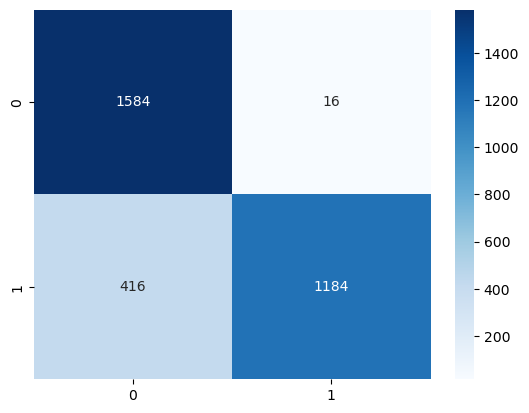

In [234]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show()

### LightGBM With GridSearch

In [235]:
# from lightgbm import LGBMClassifier

# LGB=LGBMClassifier(random_state=42)
# # with grid search

# param_grid = {
#     'n_estimators': [100, 200],            # Number of boosting rounds
#     'max_depth': [3, 5, 7],                # Maximum tree depth
#     'learning_rate': [0.01, 0.1, 0.2],     # Step size shrinkage
#     'subsample': [0.8, 1],                 # Row subsampling
#     'colsample_bytree': [0.8, 1],          # Feature subsampling
#     'reg_alpha': [0, 0.1],                 # L1 regularization
#     'reg_lambda': [1, 10]                  # L2 regularization
# }
# grid_search = GridSearchCV(
#     estimator=LGB,
#     param_grid=param_grid,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=1
# )

# grid_search.fit(X_train, y_train)

# best_lgb = grid_search.best_estimator_

# y_pred = best_lgb.predict(X_test)
# y_pred_train = best_lgb.predict(X_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
# print("Test Accuracy:", accuracy_score(y_test, y_pred))



#### LightGBM With Best Parameters

In [243]:
lgmb_model = LGBMClassifier( n_estimators = 200, max_depth = 7, learning_rate = 0.1, 
                            reg_alpha = 0, reg_lambda = 10, colsample_bytree = 0.8, subsample = 0.8, random_state=42)
lgmb_model.fit(X_train, y_train)

y_pred = lgmb_model.predict(X_test)
y_pred_train = lgmb_model.predict(X_train)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("#############################################################################")
print(classification_report(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6400, number of negative: 6400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001673 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2585
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Train Accuracy: 0.900625
Test Accuracy: 0.86
###############################################################

### Simple MultiLayer Perceptron

In [240]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],),
          kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu',
          kernel_regularizer=l2(0.001)),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])


early_stop = EarlyStopping(
    monitor='val_recall',
    mode='max',
    patience=10,
    restore_best_weights=True
)

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=[
    Recall(name='recall'),
    Precision(name='precision'),
    AUC(name='auc')
])

model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - auc: 0.6009 - loss: 0.8441 - precision: 0.4714 - recall: 0.5256 - val_auc: 0.0000e+00 - val_loss: 0.5469 - val_precision: 1.0000 - val_recall: 0.8152
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 0.7478 - loss: 0.6230 - precision: 0.7144 - recall: 0.5364 - val_auc: 0.0000e+00 - val_loss: 0.2678 - val_precision: 1.0000 - val_recall: 0.9277
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc: 0.7614 - loss: 0.5690 - precision: 0.7903 - recall: 0.5233 - val_auc: 0.0000e+00 - val_loss: 0.2305 - val_precision: 1.0000 - val_recall: 0.9102
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc: 0.7849 - loss: 0.5229 - precision: 0.8896 - recall: 0.5358 - val_auc: 0.0000e+00 - val_loss: 0.1884 - val_precision: 1.0000 - val_recall: 0.9145
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc: 0.7817 - loss: 0.4949 - precision: 0.9283 - recall: 0.5337 - val_auc: 0.0000e+00 - val_loss: 0.1599 - val_precision: 1.0

In [241]:
y_prob = model.predict(X_test).ravel()
y_pred = (y_prob >= 0.5).astype(int)
y_prob_train = model.predict(X_train).ravel()
y_pred_train = (y_prob_train >= 0.5).astype(int)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print(classification_report(y_test, y_pred))

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step
Test Accuracy: 0.8615625
Train Accuracy: 0.8553125
              precision    recall  f1-score   support

           0       0.79      0.98      0.88      1600
           1       0.98      0.74      0.84      1600

    accuracy                           0.86      3200
   macro avg       0.88      0.86      0.86      3200
weighted avg       0.88      0.86      0.86      3200



#
<a id='1'></a>

<p style="
    background: linear-gradient(to right, #5C4033, #8B5A2B); 
    font-family: 'Times New Roman', serif; 
    color: #F5DEB3; 
    font-size: 30px; 
    text-align: center; 
    border-radius: 12px; 
    padding: 12px; 
    border: 3px solid #D2B48C;
    box-shadow: 2px 2px 10px rgba(210, 180, 140, 0.5);
    font-weight: bold;
    letter-spacing: 1px;
">
    Saving Results 
</p>


In [239]:
## Save best model & Encoders, scaler

joblib.dump(binary_encoders, r'C:\Users\moham\Downloads\Amit_Course\Graduation_Project\Heart_Disease_Prediction\Models\Binary_Encoders.pkl')
joblib.dump(ordinal_encoder, r'C:\Users\moham\Downloads\Amit_Course\Graduation_Project\Heart_Disease_Prediction\Models\Ordinal_Encoder.pkl')
joblib.dump(Target_encoder, r'C:\Users\moham\Downloads\Amit_Course\Graduation_Project\Heart_Disease_Prediction\Models\Target_Encoder.pkl')
joblib.dump(scaler, r'C:\Users\moham\Downloads\Amit_Course\Graduation_Project\Heart_Disease_Prediction\Models\MinMax_Scaler.pkl')
joblib.dump(cat_model, r'C:\Users\moham\Downloads\Amit_Course\Graduation_Project\Heart_Disease_Prediction\Models\CatBoost_Model.pkl')

['C:\\Users\\moham\\Downloads\\Amit_Course\\Graduation_Project\\Heart_Disease_Prediction\\Models\\CatBoost_Model.pkl']